In [66]:
import numpy as np

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [67]:
df =pd.read_csv(r'C:\Users\SRK\Desktop\siva_python\EDA\StudentsPerformance.csv')

In [68]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [69]:
df.shape

(1000, 8)

SECTIONA

1). List out the set of categorical and numerical variables in the dataset . (1 Mark)  

In [70]:
df.columns # we can see the columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

In [71]:
cat =[i for i in df.columns if df[i].dtype =='object']
num = [i for i in df.columns if df[i].dtype =='int64']
print('catagorical :',cat)
print('numerical   : ',num)

catagorical : ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']
numerical   :  ['math score', 'reading score', 'writing score']


In [72]:
df.info()# we can also see with this.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
gender                         1000 non-null object
race/ethnicity                 1000 non-null object
parental level of education    1000 non-null object
lunch                          1000 non-null object
test preparation course        1000 non-null object
math score                     1000 non-null int64
reading score                  1000 non-null int64
writing score                  1000 non-null int64
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


2). Find out the missing values ( in %) for all variables  in the data set? (1 Mark) 

In [73]:
df.isna().sum()*100/df.isna()['gender'].count()# here are the percentages 

gender                         0.0
race/ethnicity                 0.0
parental level of education    0.0
lunch                          0.0
test preparation course        0.0
math score                     0.0
reading score                  0.0
writing score                  0.0
dtype: float64

<b>assumptions</b>:considering none in lunch as string as suggested by faculty , we dont have 

<b>obs</b>: The data doesnt have any null values.

3). Find the Percentage of students who have completed the test preparation course. (1 Mark)  4

In [74]:
df[df['test preparation course']=='completed']['test preparation course'].count()*100/df['test preparation course'].count()

35.8

<b>obs</b>:35.8 percent of students have completed the course .

In [75]:
df['parental level of education'].value_counts().head(1)

some college    226
Name: parental level of education, dtype: int64

<b>obs</b>: the level of education by most parents are done in some college

5.) Add a new column to the dataset which is a total score of each student obtained by combining math, reading and writing score.

In [76]:
df['total score'] = df['math score']+df['reading score']+df['writing score']

In [77]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total score
0,female,group B,bachelor's degree,standard,none,72,72,74,218
1,female,group C,some college,standard,completed,69,90,88,247
2,female,group B,master's degree,standard,none,90,95,93,278
3,male,group A,associate's degree,free/reduced,none,47,57,44,148
4,male,group C,some college,standard,none,76,78,75,229


<b>section B</b>:
    

6.a). Create dummy columns for the categorical variable 'lunch'. (1 mark)  b

In [78]:
pd.get_dummies(df['lunch'])# just creating dummies as requested

,free/reduced,standard
0,0,1
1,0,1
2,0,1
3,1,0
4,0,1
5,0,1
6,0,1
7,1,0
8,1,0
9,1,0


b) Retain the column lunch_standard and remove the other one. (2 marks)

In [79]:
df['lunch_standard'] =pd.get_dummies(df['lunch'],drop_first=True)
# dropping the first column of dummies as requested.

c) Analyze and compare the percentage of female’s vs percentage of males who receive standard lunch. (2 Marks)

In [80]:
df[df['lunch_standard']==1].groupby('gender')['lunch_standard'].count()*100/df[df['lunch_standard']==1]['gender'].count()


#*100/df.groupby('gender')['lunch_standard'].count()

gender
female    51.007752
male      48.992248
Name: lunch_standard, dtype: float64

<b>obs</b>: 51% of females took standard lunch and 48.9% of males took tandard lunch

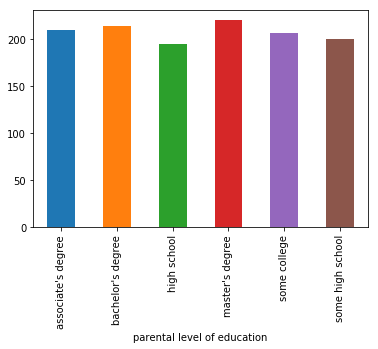

In [81]:
df.groupby('parental level of education')['total score'].apply(np.median).plot(kind ='bar')
plt.show()

<b>obs</b>:The median Total score ofstudents scores high when their parents having  master or bachelors degree. 

To analyse the above fields, we can 

parental level of education
associate's degree    AxesSubplot(0.125,0.125;0.775x0.755)
bachelor's degree     AxesSubplot(0.125,0.125;0.775x0.755)
high school           AxesSubplot(0.125,0.125;0.775x0.755)
master's degree       AxesSubplot(0.125,0.125;0.775x0.755)
some college          AxesSubplot(0.125,0.125;0.775x0.755)
some high school      AxesSubplot(0.125,0.125;0.775x0.755)
Name: total score, dtype: object

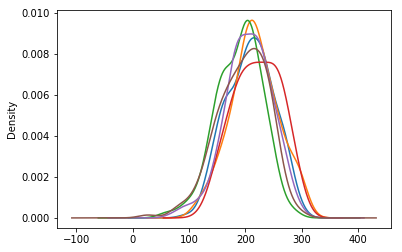

In [82]:
df.groupby('parental level of education')['total score'].plot(kind = 'kde')


In [83]:
df.groupby('parental level of education')['total score'].apply(np.max)

parental level of education
associate's degree    300
bachelor's degree     300
high school           287
master's degree       293
some college          297
some high school      297
Name: total score, dtype: int64

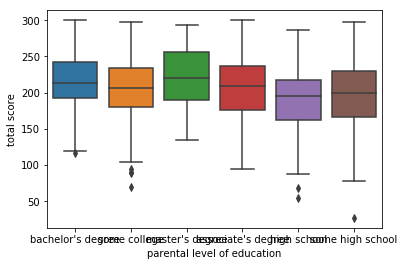

In [84]:
sns.boxplot(y ='total score', x = 'parental level of education',data =df)

<b>obs</b>: lets see the right skewed and highest median which gives us the  more high scoring students.
  that is for masters and bachelor's degree

In [85]:
df.groupby('lunch')['total score'].apply(np.max)

lunch
free/reduced    293
standard        300
Name: total score, dtype: int64

lunch
free/reduced    AxesSubplot(0.125,0.125;0.775x0.755)
standard        AxesSubplot(0.125,0.125;0.775x0.755)
Name: total score, dtype: object

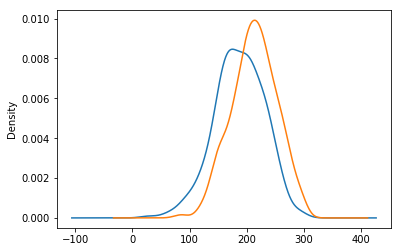

In [86]:
df.groupby('lunch')['total score'].plot(kind = 'kde')


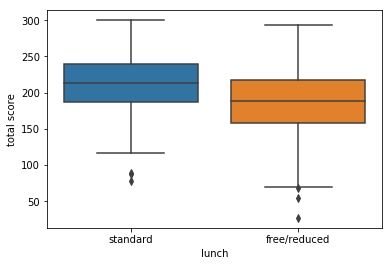

In [87]:
sns.boxplot(y ='total score', x = 'lunch',data =df)

In [88]:
df.groupby('gender')['total score'].apply(np.max)

gender
female    300
male      300
Name: total score, dtype: int64

gender
female    AxesSubplot(0.125,0.125;0.775x0.755)
male      AxesSubplot(0.125,0.125;0.775x0.755)
Name: total score, dtype: object

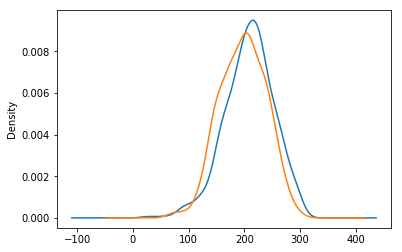

In [89]:
df.groupby('gender')['total score'].plot(kind = 'kde')


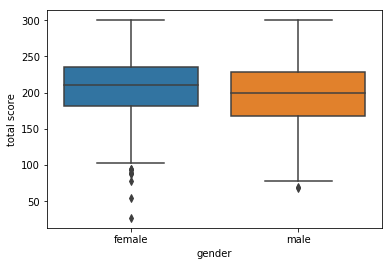

In [90]:
sns.boxplot(y ='total score', x = 'gender',data =df)

In [91]:
female has more highest scores

SyntaxError: invalid syntax (<ipython-input-91-aaec3e0066f7>, line 1)

In [92]:
df.groupby('race/ethnicity')['total score'].apply(np.max)

race/ethnicity
group A    289
group B    290
group C    296
group D    297
group E    300
Name: total score, dtype: int64

race/ethnicity
group A    AxesSubplot(0.125,0.125;0.775x0.755)
group B    AxesSubplot(0.125,0.125;0.775x0.755)
group C    AxesSubplot(0.125,0.125;0.775x0.755)
group D    AxesSubplot(0.125,0.125;0.775x0.755)
group E    AxesSubplot(0.125,0.125;0.775x0.755)
Name: total score, dtype: object

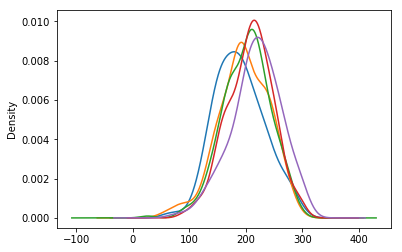

In [93]:
df.groupby('race/ethnicity')['total score'].plot(kind = 'kde')

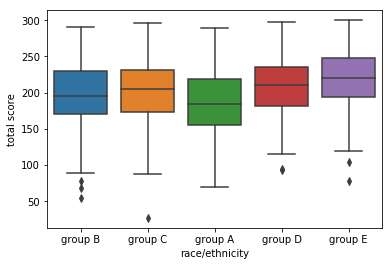

In [94]:
sns.boxplot(y ='total score', x = 'race/ethnicity',data =df)

group E has highest scoring marks.

In [96]:
df.groupby(['gender','race/ethnicity','parental level of education','lunch','test preparation course'])['total score'].apply(max)

gender  race/ethnicity  parental level of education  lunch         test preparation course
female  group A         associate's degree           free/reduced  none                       226
                                                     standard      completed                  209
                                                                   none                       268
                        bachelor's degree            standard      none                       201
                        high school                  free/reduced  completed                  250
                                                     standard      completed                  236
                                                                   none                       201
                        master's degree              free/reduced  none                       190
                                                     standard      none                       161
                        som

Section c

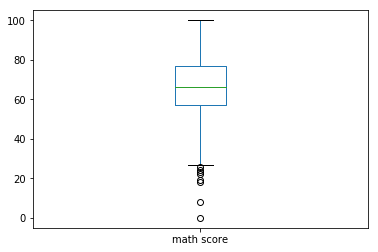

In [97]:
df['math score'].plot(kind = 'box')

yes it has many outliers in the lower end 

In [98]:
q1 = df['math score'].quantile(0.25)
q3 =df['math score'].quantile(0.75)
IQR = q3-q1
lowerlimit =q1- 1.5* IQR
df[df['math score'] < lowerlimit]['math score']# set odf outliers in math

17     18
59      0
145    22
338    24
466    26
787    19
842    23
980     8
Name: math score, dtype: int64

In [99]:
df[df['math score'] >= lowerlimit]['math score'].count() # data set of mathscore  without outliers.

992

In [100]:
df[['reading score','writing score']].corr()


,reading score,writing score
reading score,1.000000,0.954598
writing score,0.954598,1.000000


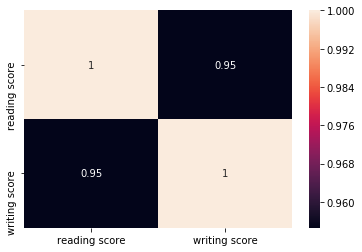

In [101]:
sns.heatmap(df[['reading score','writing score']].corr(),annot =True)

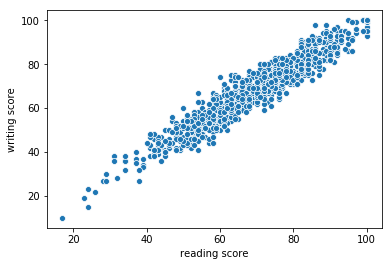

In [102]:
sns.scatterplot(x =df['reading score'],y =df['writing score'])
plt.show()

Generally one -hot encoding is preferred as it is not rank based as label encoding and we can get n-1 catagory cols  to define the col after encoding. 

In [103]:
cat =[i for i in df.columns if df[i].dtype =='object']

df = pd.get_dummies(df,columns =cat,drop_first=True)
df.head()


,math score,reading score,writing score,total score,lunch_standard,gender_male,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E,parental level of education_bachelor's degree,parental level of education_high school,parental level of education_master's degree,parental level of education_some college,parental level of education_some high school,lunch_standard,test preparation course_none
0,72,72,74,218,1,0,1,0,0,0,1,0,0,0,0,1,1
1,69,90,88,247,1,0,0,1,0,0,0,0,0,1,0,1,0
2,90,95,93,278,1,0,1,0,0,0,0,0,1,0,0,1,1
3,47,57,44,148,0,1,0,0,0,0,0,0,0,0,0,0,1
4,76,78,75,229,1,1,0,1,0,0,0,0,0,1,0,1,1


In [104]:
y =df['total score']

In [105]:
x = df.drop(columns ='total score')

In [106]:
y.shape,x.shape

((1000,), (1000, 16))

In [107]:
from sklearn.model_selection import train_test_split 


In [108]:
x_train,x_test,y_train,y_test, = train_test_split(x,y,train_size =0.7,random_state =0)
print('size of xtrain is',x_train.shape)
print('size of ytrain is',y_train.shape)
print('size of xtext is',x_test.shape)
print('size of ytext is',y_test.shape)

size of xtrain is (700, 16)
size of ytrain is (700,)
size of xtext is (300, 16)
size of ytext is (300,)


C:\Users\SRK\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)
